## 数据科学导论大作业
###  数据集描述：
名字：Synthetic Financial Datasets For Fraud Detection

URL: https://www.kaggle.com/ntnu-testimon/paysim1

官方介绍：PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

### 加载数据集

In [1]:
import pandas as pd

In [2]:
file_path = "D:\\Study\\Nanjing_University\\数据科学导论\\Week 10\\Final Project\\"
file_name = "PS_20174392719_1491204439457_log.csv"

with open(file_path + file_name) as data_file:
    data = pd.read_csv(data_file)
# Print Shape of Data.
print("数据集大小：", data.shape)

数据集大小： (6362620, 11)


In [3]:
# 简单看一下数据集的格式等基本信息。
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### 以下是来自数据集网站的官方描述:

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# 1. 探索性数据分析（EDA）和数据清理

### 数据概览

In [5]:
# Formats of features.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.drop(["step", "type", 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud'], axis=1).describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [7]:
# See if there is any missing data.
data.isnull().sum().sort_values(ascending = False)

isFlaggedFraud    0
isFraud           0
newbalanceDest    0
oldbalanceDest    0
nameDest          0
newbalanceOrig    0
oldbalanceOrg     0
nameOrig          0
amount            0
type              0
step              0
dtype: int64

计算欺诈交易的比例

In [8]:
percent = 1.0 * len(data.loc[data.isFraud == 1]) / len(data)
print("欺诈交易数占交易总数的比例为：", percent)

欺诈交易数占交易总数的比例为： 0.001290820448180152


似乎没有明显的缺失数据。

尝试发现一些欺诈交易的特点：

In [9]:
data[data.isFraud == 1].head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0


我发现，上表的一些数据中交易前后的账户余额似乎有一些不正常的数据，比如oldbalanceDest和newbalanceDest交易前后没有变化，都是0。  
  
按照理论上来说，amount作为交易额，应该有oldbalanceOrg - newbalanceOrig = newbalanceDest - oldbalanceDest = amount才对。  

因此，我想先看一下究竟欺诈交易和诚信交易中分别有多少不再满足这个条件的数据。  

注意：这个统计有三个限制条件：
1. 根据数据集给出的特征描述，涉及商家即M开头的name的交易是肯定没有信息的，统计的时候不计入。  
2. 对于欺诈交易而言，被标记的欺诈交易是被阻止的交易，也不计入。  
3. 根据数据集的描述，CASH_IN类别是存钱的意思，因此和balanceDest是没有关系的，计算balanceDest之间的关系的时候注意排除。  

In [10]:
fraudData = data.loc[data.isFraud == 1, :]
strangeFraud = data.loc[(data.isFraud == 1) &(data.isFlaggedFraud == 0)
                        & ~((data.nameOrig.str.startswith('M')) | data.nameDest.str.startswith('M'))
                        & ((data.oldbalanceOrg - data.newbalanceOrig != data.amount) 
                               | ((data.newbalanceDest - data.oldbalanceDest != data.amount) & (data.type != "CASH_IN")) 
                           | (data.type == "CASH_IN")), :]
fraudDataNum = len(fraudData)
strangeFraudNum = len(strangeFraud)
print("数据不正常的欺诈交易个数为：{}, 占总欺诈交易的比例为: {}".format(strangeFraudNum, strangeFraudNum / fraudDataNum))

nonFraudData = data.loc[data.isFraud == 0, :]
strangeNonFraud = data.loc[(data.isFraud == 0) & ~((data.nameOrig.str.startswith('M')) | data.nameDest.str.startswith('M')) 
                           & ((data.oldbalanceOrg - data.newbalanceOrig != data.amount) 
                               | ((data.newbalanceDest - data.oldbalanceDest != data.amount) & (data.type != "CASH_IN"))
                             | (data.type == "CASH_IN")), :]
nonFraudNum = len(nonFraudData)
strangeNonFraudNum = len(strangeNonFraud)
print("数据不正常的诚实交易个数为：{},占总诚实交易的比例为：{}".format(strangeNonFraudNum, strangeNonFraudNum / nonFraudNum))

数据不正常的欺诈交易个数为：6036, 占总欺诈交易的比例为: 0.7349324242055278
数据不正常的诚实交易个数为：4145038,占总诚实交易的比例为：0.6523091769224099


In [11]:
strangeNonFraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.00,C1100439041,22425.0,0.00,0,0
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.0,16896.70,0,0


理论上，诚实交易作为正常交易，数据上应当很少会出现问题，即“不正常数据”应当很少。
  
但是，结果中虽然总体上“不正常”的数据在欺诈交易里更多一些，不过诚实交易也有超过一半不满足这个条件，因此我觉得这些数据可能是出于一些“系统原因”，比如数据更新不及时或者交易信息不全等原因。  
  
结合上表不满足条件的诚实交易的信息，看上去许多交易是正常的，因此我觉得是这个条件可能过于严格，不能够用于判断数据是否“正常”。  
  
下面尝试采用根据上面欺诈交易的表格判断出的，以oldbalanceDest和newbalanceDest都是0的情况判断数据是否正常。  
  
这种情况下同样需要排除掉CASH_IN的情况，因为CASH_IN类别是存钱，和balanceDest无关，因而的balanceDest都是0

In [12]:
fraudData = data.loc[data.isFraud == 1, :]
strangeFraud = data.loc[(data.isFraud == 1) & (data.type != "CASH_IN") & (data.isFlaggedFraud == 0) 
                        & ~((data.nameOrig.str.startswith('M')) | data.nameDest.str.startswith('M')) 
                        & ((data.oldbalanceDest == 0) 
                               &(data.newbalanceDest == 0)), :]
fraudDataNum = len(fraudData)
strangeFraudNum = len(strangeFraud)
print("数据不正常的欺诈交易个数为：{}, 占总欺诈交易的比例为: {}".format(strangeFraudNum, strangeFraudNum / fraudDataNum))

nonFraudData = data.loc[data.isFraud == 0, :]
strangeNonFraud = data.loc[(data.isFraud == 0) & (data.type != "CASH_IN") 
                           & ~((data.nameOrig.str.startswith('M')) | data.nameDest.str.startswith('M')) 
                           & ((data.oldbalanceDest == 0) 
                               &(data.newbalanceDest == 0)), :]
nonFraudNum = len(nonFraudData)
strangeNonFraudNum = len(strangeNonFraud)
print("数据不正常的诚实交易个数为：{},占总诚实交易的比例为：{}".format(strangeNonFraudNum, strangeNonFraudNum / nonFraudNum))

数据不正常的欺诈交易个数为：4060, 占总欺诈交易的比例为: 0.49433824424692563
数据不正常的诚实交易个数为：1706,占总诚实交易的比例为：0.0002684750913814617


以oldbalanceDest = newbalanceDest = 0作为条件，欺诈交易和诚实交易出现了明显的区别，因此我认为这个条件更能反映数据是否正常。

In [13]:
strangeNonFraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1248,1,TRANSFER,271161.74,C1658487789,0.0,0.00,C1219161283,0.0,0.0,0,0
10836,7,CASH_OUT,106696.42,C1256767272,273874.0,167177.58,C899625985,0.0,0.0,0,0
13105,7,TRANSFER,89659.74,C1397283620,17424.0,0.00,C1002031672,0.0,0.0,0,0
14534,8,CASH_OUT,196115.36,C1319647571,69676.0,0.00,C847761155,0.0,0.0,0,0
15386,8,CASH_OUT,84868.29,C1402049606,48584.0,0.00,C1564588329,0.0,0.0,0,0
15398,8,TRANSFER,741192.56,C112345235,33238.0,0.00,C701279123,0.0,0.0,0,0
15990,8,CASH_OUT,135624.34,C640285416,78506.0,0.00,C1649449847,0.0,0.0,0,0
16196,8,CASH_OUT,25027.98,C1620624856,168279.0,143251.02,C1654056127,0.0,0.0,0,0
17286,8,CASH_OUT,27047.91,C627621884,11334.0,0.00,C1938612885,0.0,0.0,0,0
17664,8,TRANSFER,92338.97,C1282310120,41121.0,0.00,C382431057,0.0,0.0,0,0


结果发现，即使在诚实交易中，这些数据看起来的确也不太“正常”。  
  
而且这类“不正常的数据”在诚实交易和欺诈交易出现的次数或频率相差很大，可以尝试作为预测欺诈的特征。

In [14]:
data[data.isFlaggedFraud == 1].head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


按照数据集所给信息，交易额大于200,000会被标记，被标记的欺诈交易会被侦测到并直接阻止，所以oldbalanceDest和newbalanceDest都是0。

由上面的分析可以看出，似乎欺诈交易的类型局限在TRANSFER和CASHI_OUT, 被标记的欺诈交易的类型似乎只有TRANSFER。  
  
因此，我在这里验证一下。

In [15]:
print("欺诈交易的类型为：", data[data.isFraud == 1].type.drop_duplicates().values)
print("被标记的欺诈交易的类型为：", data[data.isFlaggedFraud == 1].type.drop_duplicates().values)

欺诈交易的类型为： ['TRANSFER' 'CASH_OUT']
被标记的欺诈交易的类型为： ['TRANSFER']


计算欺诈交易和被标记的欺诈交易占总交易数的比例作为基准。

In [16]:
fraudNum = len(data[data.isFraud == 1])
flaggedFraudNum = len(data[data.isFlaggedFraud == 1])
totalNum = len(data)
print("欺诈交易的个数为：{}，比例为：{}".format(fraudNum, fraudNum / totalNum * 1.0))
print("被标记的欺诈交易的个数为：{}，比例为：{}".format(flaggedFraudNum, flaggedFraudNum / totalNum * 1.0))

欺诈交易的个数为：8213，比例为：0.001290820448180152
被标记的欺诈交易的个数为：16，比例为：2.51468734577894e-06


结合上面的分析可以看出：  
1. 欺诈交易的比例比较少，说明这样一个数据集是不均衡的，使用机器学习预测的时候可能需要按类别进行加权。  
2. 被标记的欺诈交易比例更少了，而且这样一个标记机制单纯以交易额作为基准进行判定，对检测欺诈交易的意义不大。

### 数据清理和特征工程

既然我们的目标是检测欺诈交易，所以根据EDA中的分析，我们只需要考虑TRANSFER和CASH_OUT两类，因为数据集中没有其他类别的欺诈交易，虽然不能说明其他数据一定不会有欺诈交易，但起码能说明说明其他类别的欺诈交易出现的可能性相对这两种会低很多，所以在构建机器学习模型时重点应当放在这两类交易上。  
  
因此，将数据集分为特征部分和待预测的标签部分，以isFraud作为标签，剩下的作为特征，并对特征进行一系列的筛选、优化。  
  
由EDA可知，isFlaggedFraud在此数据集中的意义不大，因此直接舍弃。  
  
并且，因为只保留了两类，所以可以使类别用数字型的特征表示，令TRANSFER = 1, CASH_OUT = 0。  

In [17]:
X = data.loc[(data.type == "TRANSFER") | (data.type == "CASH_OUT"), :]

# Label for prediction
Y = X['isFraud']
X = X.drop(['isFraud', 'isFlaggedFraud'], axis=1)

# Orig和Dest的账户名对于预测是否是欺诈交易的影响不大，因此直接舍弃。
X = X.drop(['nameOrig', 'nameDest'], axis=1)

X.loc[X.type == 'TRANSFER', 'type'] = 1
X.loc[X.type == 'CASH_OUT', 'type'] = 0
X.type = X.type.astype(int) # convert type from object to int

尝试利用EDA中分析出的"不正常数据"：  
  
因为许多欺诈交易的两个balanceDest都为0，但是如果用于机器学习的算法这样的特征就不够明显，因此我决定对其采用负值，强化其“不正常”的特性。

In [18]:
X.loc[((X.oldbalanceDest == 0) & (X.newbalanceDest == 0)), ['oldbalanceDest', 'newbalanceDest']] = -10

对表示数值大小的特征做一个相关性分析：

In [19]:
X.drop("type", axis=1).corr("pearson")

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
step,1.000000,0.037007,0.005744,-0.011280,0.037778,0.037475
amount,0.037007,1.000000,0.120389,0.018296,0.307133,0.497027
oldbalanceOrg,0.005744,0.120389,1.000000,0.778826,-0.020404,-0.010029
newbalanceOrig,-0.011280,0.018296,0.778826,1.000000,-0.012277,-0.015439
oldbalanceDest,0.037778,0.307133,-0.020404,-0.012277,1.000000,0.970060
newbalanceDest,0.037475,0.497027,-0.010029,-0.015439,0.970060,1.000000


可以看出：  
1. oldbalanceDest和newbalanceDest相关度非常高。
2. oldbalanceOrg和newbalanceOrig的相关度也比较高。
3. 和amount相关度最高的两个特征为：newbalanceDest, oldbalanceDest。
5. step和任意一个其他特征相关性都不大，一定程度上说明这些特征相对于时间是独立的。
  
总的来说，这些推论都是符合常识也是符合预期的。

对最终选出来的特征做一个较为直观的概览:

In [20]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,1,181.00,181.0,0.0,-10.0,-10.00
3,1,0,181.00,181.0,0.0,21182.0,0.00
15,1,0,229133.94,15325.0,0.0,5083.0,51513.44
19,1,1,215310.30,705.0,0.0,22425.0,0.00
24,1,1,311685.89,10835.0,0.0,6267.0,2719172.89


### 数据可视化

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>


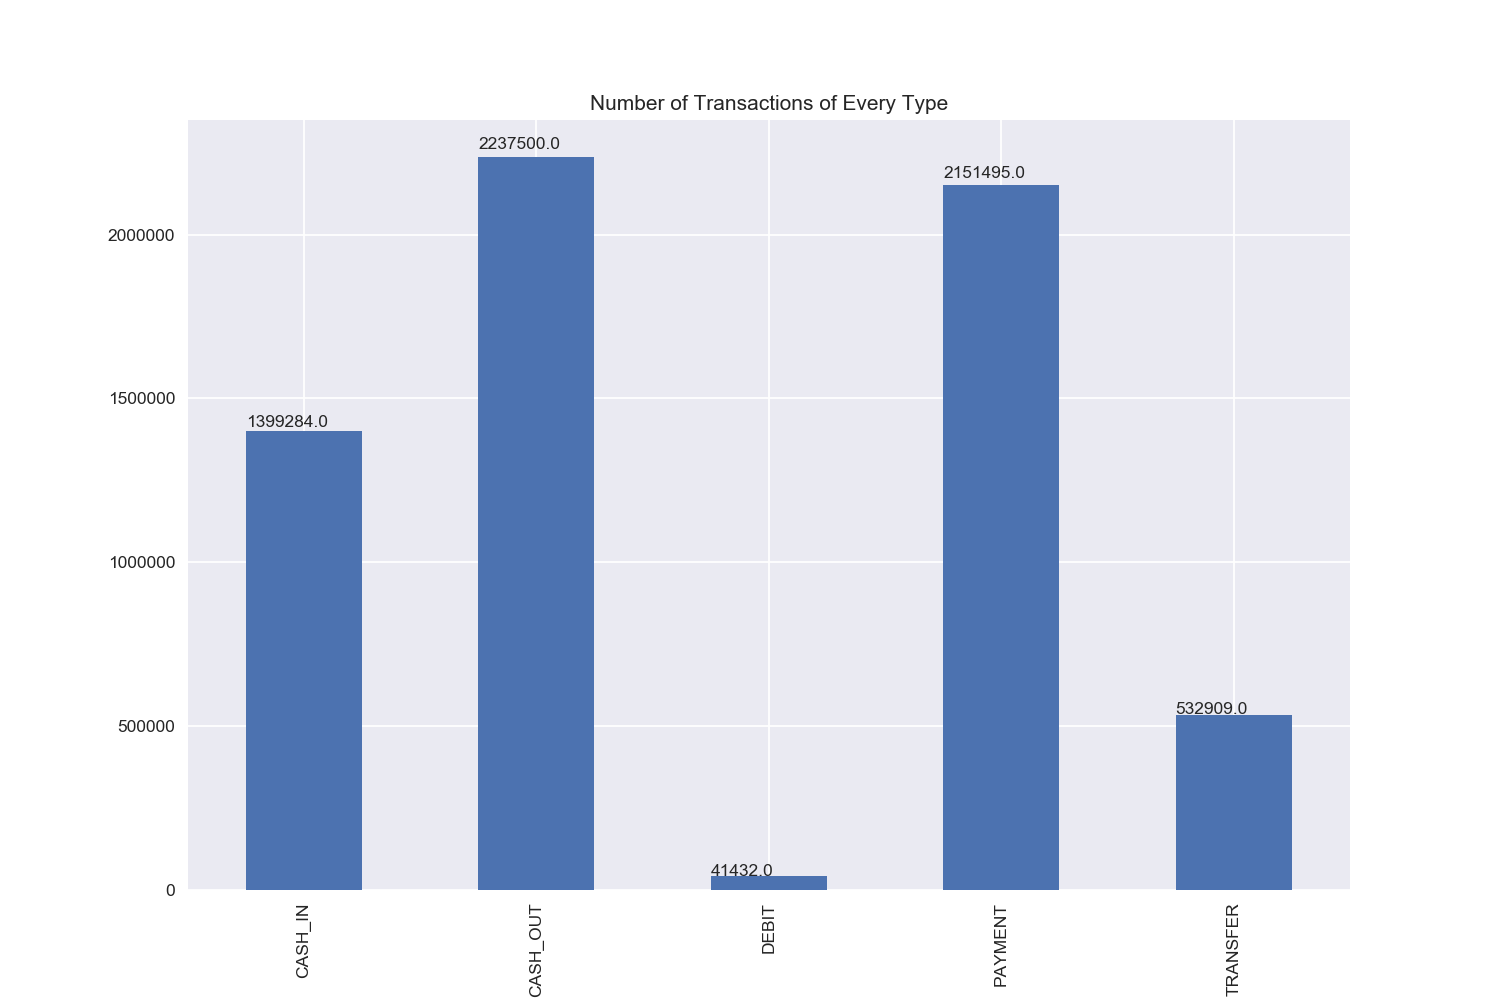

In [43]:
%matplotlib notebook
plt.figure(figsize=(12, 8))
figure1 = data.groupby("type").size().plot(kind="bar")
figure1.set_title("Number of Transactions of Every Type")
for patch in figure1.patches:
    figure1.annotate(patch.get_height(), (patch.get_x(), patch.get_height() * 1.01))

这个图反映出的情况是，PAYMENT（支付）和CASH_OUT（提现）、CASH_IN（存入）还是该系统最常被使用的服务，类比支付宝，还是十分符合实际的，比较有趣。

<IPython.core.display.Javascript object>


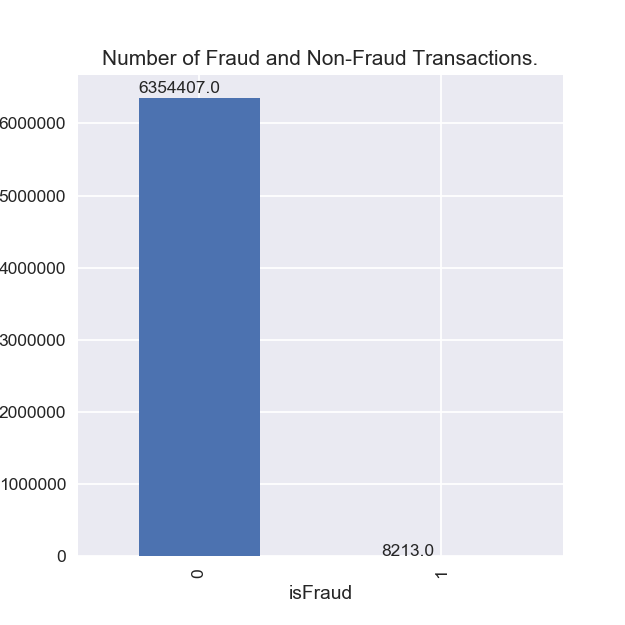

In [44]:
%matplotlib notebook
figure2 = data.groupby('isFraud').size().plot(kind='bar', figsize=(5, 5))
figure2.set_title("Number of Fraud and Non-Fraud Transactions.")
for patch in figure2.patches:
    figure2.annotate(patch.get_height(), (patch.get_x(), patch.get_height() * 1.01))

由上图可以看出，该数据集中欺诈交易的数量远小于诚实交易的数量，是数据不平衡的数据集。

<IPython.core.display.Javascript object>


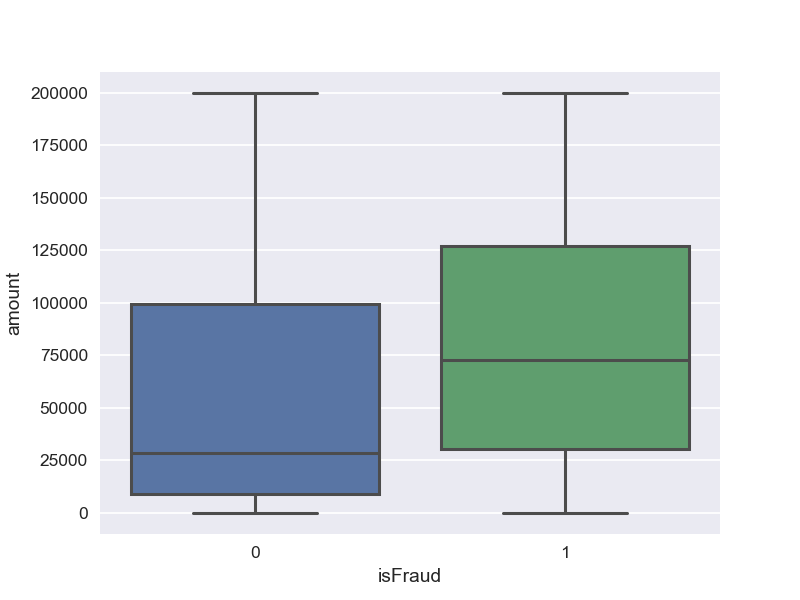

In [45]:
figure = plt.figure()
# 由于金额涉及20,000以上的会被系统直接标记为欺诈交易，所以这里只考虑20,000以下的交易。
sns.boxplot(data=data.loc[data.amount < 200000, :], x='isFraud', y='amount')
plt.show()

由箱线图可以看出，欺诈交易的金额总体似乎要比诚实交易的金额大很多。

再按照类别查看一下金额特征：

<IPython.core.display.Javascript object>


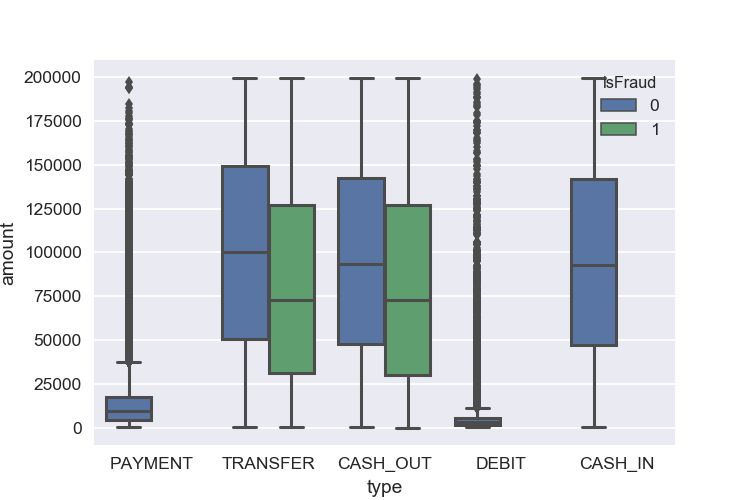

In [46]:
plt.figure(figsize=(6,4))
sns.boxplot(hue = 'isFraud', x = 'type', y = 'amount', data = data.loc[data.amount < 200000, :])

通过这个图可以看出，该数据集中的欺诈交易只出现TRANSFER和CASH_OUT两类数据中。  
  
令人意外的是，按类别之后，发现TRANSFER和CASH_OUT两个类都是诚实交易的涉及的金额更大一些，说明刚才总体诚实交易金额低于欺诈交易金额的主要原因是欺诈交易集中在TRANSFER和CASH_OUT两个类中。
  
很有意思的一点是，绝大部分的DEBIT和PAYMENT涉及的金额都是很小的，而相对来说TRANSFER，CASH_IN, CASH_OUT就比较大。（使我联想到了我们使用支付宝买东西一般都是比较小的金额，而转账提现则往往会比较大，的确是这样的。DEBIT可能相当于借钱，即我们的蚂蚁花呗，大部分人的额度比较低，所以也比较类似）

可视化相关系数图：

<IPython.core.display.Javascript object>


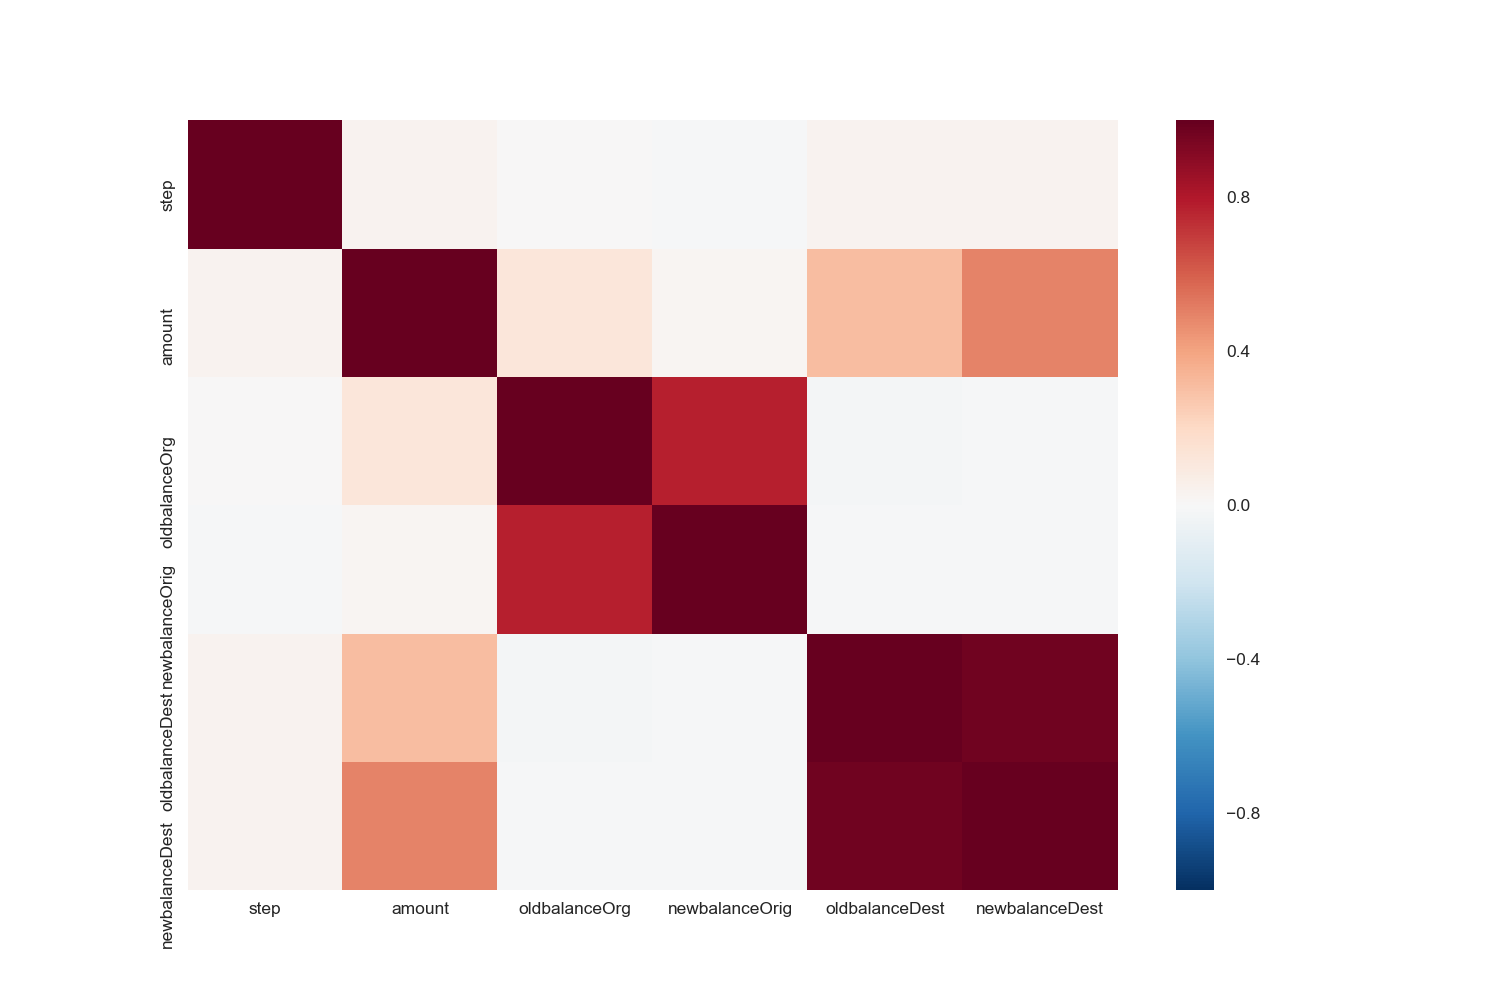

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.drop("type", axis=1).corr("pearson"))
plt.show()

最后，借助PCA降维观察一下该数据是否容易被分类。

降维前的数据维度： (2770409, 7)
降维后的数据维度： (2770409, 2)
PCA计算出的各主成分的方差值占总方差值的比例： [ 0.96737358  0.02819872]


<IPython.core.display.Javascript object>


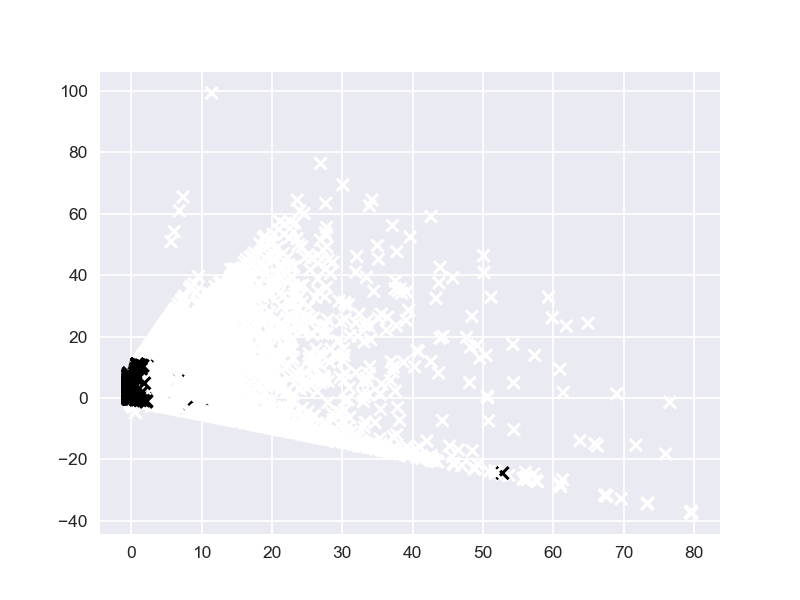

In [49]:
from sklearn.decomposition import PCA
pca_2c = PCA(n_components=2, whiten=True, svd_solver='auto')
pca = pca_2c.fit_transform(X)
print("降维前的数据维度：", X.shape)
print("降维后的数据维度：", pca.shape)
print("PCA计算出的各主成分的方差值占总方差值的比例：", pca_2c.explained_variance_ratio_)
plt.figure()
plt.scatter(pca[:, 0], pca[:, 1], marker='x', c=Y)
plt.show()

由图可见，经过特征选择和处理的数据的主成分还是较为可分的，可以送入机器学习系统进行分类。

# 2. 机器学习检测欺诈交易及模型分析

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
# 切分训练集和测试集
random_state = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
# 不同类特征之间的数值具有较大差距，因此我们先将数据归一化
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,1,181.00,181.0,0.0,-10.0,-10.00
3,1,0,181.00,181.0,0.0,21182.0,0.00
15,1,0,229133.94,15325.0,0.0,5083.0,51513.44
19,1,1,215310.30,705.0,0.0,22425.0,0.00
24,1,1,311685.89,10835.0,0.0,6267.0,2719172.89


根据EDA和可视化数据可知，该数据集中诚实交易和欺诈交易的数量相差过大，属于不平衡的数据，因此这里为每个类加上一个权重，进行平衡。

In [30]:
class_weight = {1:10, 0:1}

#### 1. 首先尝试使用逻辑回归模型进行预测：

In [31]:
LR_classifier = LogisticRegression(class_weight=class_weight)
LR_classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight={1: 10, 0: 1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [32]:
Y_pred = LR_classifier.predict(X_test)

模型评价  
混淆矩阵描述：  
0，0：实际为0，预测为0。  
0，1：实际为0，预测为1。  
1，0：实际为1，预测为0。  
1，1：实际为1，预测为1。  
  
评价指标：  
Precision = TP / (TP + FP)  
Recall = TP / (TP + FN)  
F1 = 2 * Precision * Recall / (Precision + Recall)

In [33]:
conf_mat = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
print("混淆矩阵：\n", conf_mat)
precision = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][0])
print("精确度(Precision)：", precision)
recall = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][1])
print("召回率(Recall)：", recall)
F1 = 2 * precision * recall / (precision + recall)
print("F1 Score：", F1)

混淆矩阵：
 [[551601    845]
 [   592   1044]]
精确度(Precision)： 0.998927911075
召回率(Recall)： 0.998110903021
F1 Score： 0.998519239925


由于两类数据差异过大，再结合混淆矩阵的表现，发现总体的评价似乎并不能反映真实情况，于是尝试按类评价。

In [34]:
acc = accuracy_score(y_true=Y_test, y_pred=Y_pred)
report = classification_report(y_true=Y_test, y_pred=Y_pred)
print("逻辑回归模型的预测准确率为：", acc)
print(report)

逻辑回归模型的预测准确率为： 0.997406521056
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    552446
          1       0.55      0.64      0.59      1636

avg / total       1.00      1.00      1.00    554082



可以看出该逻辑回归模型对欺诈交易1的精确度Precision只有55%，召回率Recalll只有64%。

#### 2. 尝试使用决策树模型进行预测：

In [35]:
DT_classifier = DecisionTreeClassifier(max_depth=3, class_weight=class_weight)
DT_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={1: 10, 0: 1}, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [36]:
Y_pred = DT_classifier.predict(X_test)

使用相同的评价标准

In [37]:
acc = accuracy_score(y_true=Y_test, y_pred=Y_pred)
report = classification_report(y_true=Y_test, y_pred=Y_pred)
print("决策树模型的预测准确率：", acc)
print(report)

决策树模型的预测准确率： 0.998980295335
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    552446
          1       0.97      0.67      0.80      1636

avg / total       1.00      1.00      1.00    554082



可以看出，决策树模型的分类表现比逻辑回归要好上不少。对欺诈交易1的预测精确度Precision达到了97%，召回率Recall达到了67%。  
  
接下来，我们来分析一下拟合出的决策树中，哪些特征比较重要。

<IPython.core.display.Javascript object>


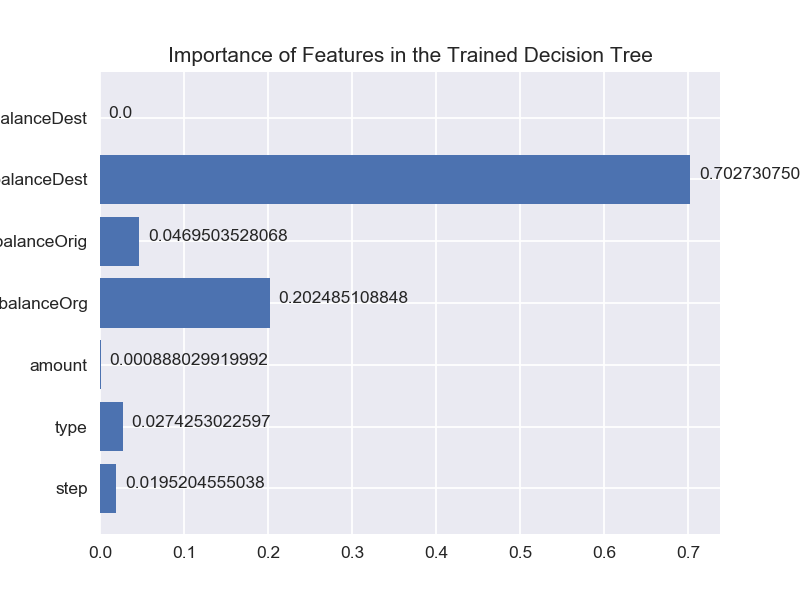

In [38]:
%matplotlib notebook
features = DT_classifier.feature_importances_
labels = ["step", "type", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

plt.barh(range(len(features)), features, tick_label = labels)
for index,feature in enumerate(features):
    plt.text(feature + 0.01, index, feature)
plt.title("Importance of Features in the Trained Decision Tree")
plt.show()

从决策树的生成结果来看，newbalanceDest / oldbalanceDest是极其重要的特征（每次训练结果不一样，但总是这两个中的一个，可能因为这两者相似性太大：欺诈交易中往往两个都是0，所以决策树只需要以其中一个为判断依据。），说明决策树也捕捉到了欺诈交易和诚实交易的“不正常数据”比例具有较大差异。  
  
这也说明了我们在数据清理和特征工程中将这样一个特点通过负值-10放大起到了一定的作用。  
  
由于在特征选取的时候已经人工选出了对于检测欺诈交易比较关键的type，所以这里的type显得不是很重要。  
  
step的重要性也比较低，说明欺诈交易的发生和时间关系不大。  
  
amount重要性极低，可能是因为在欺诈交易中很多情况下数据是不正常的，因此amount参考意义不大。

最后，尝试对决策树进行可视化。  
  
该部分需要用到pydotplus库和GraphViz程序，phdotplus库可使用pip或conda直接安装并配置，GraphViz程序安装：http://www.graphviz.org/download/  
  
安装完成后将GraphViz的安装目录加入环境变量或将下面的GraphViz_Path换成对应的GraphViz安装目录，临时加入环境变量。

In [39]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import os

GraphViz_Path = 'D:\\Study\\GraphViz\\bin'
os.environ["PATH"] += os.pathsep + GraphViz_Path

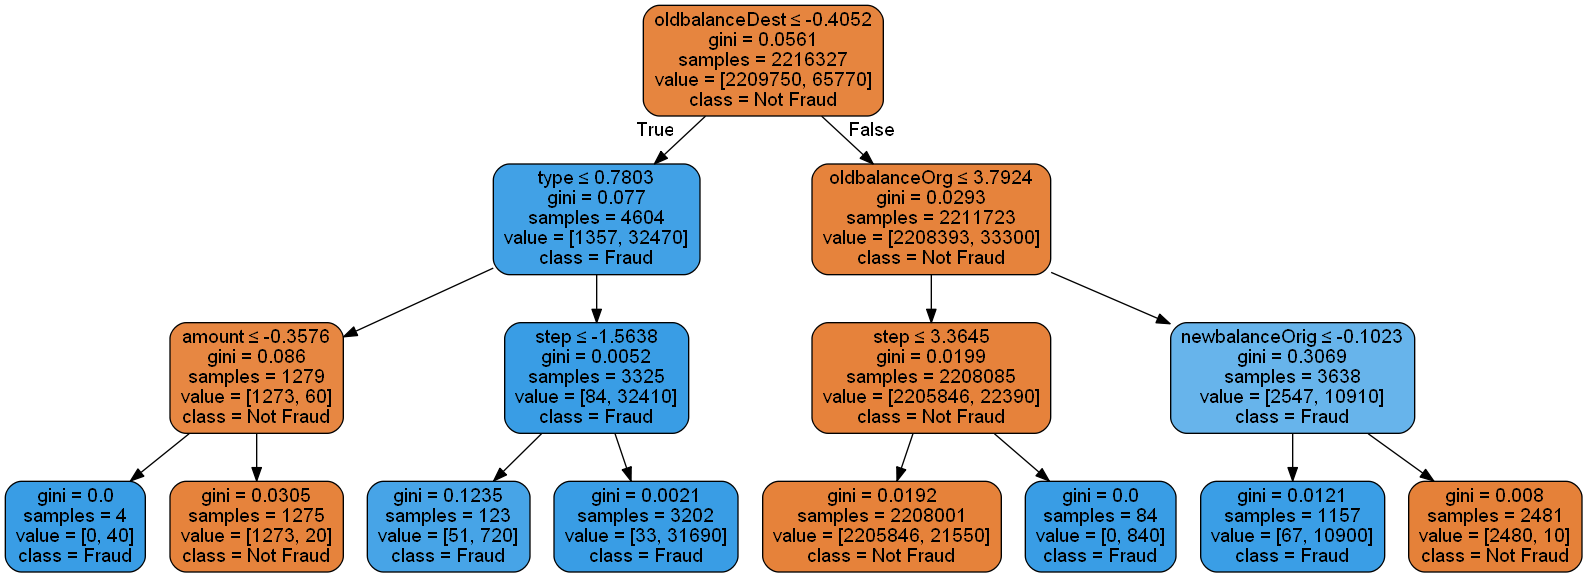

In [40]:
dot_data = tree.export_graphviz(DT_classifier, out_file=None, 
                         feature_names=labels,  
                         class_names=['Not Fraud', 'Fraud'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

最后，可视化的决策树印证了上面的推断，并且该决策树体现了：  
1. 当oldbalanceOrg（即初始账户上的余额）很大时，发生欺诈交易的可能性更大。
2. 当newbalanceOrig（即交易后的账户上的余额）很小时，发生欺诈交易的可能性更大。  
  
这和我们的经验一致，符合我们的认知。

附：尝试一下集成模型——随机森林：

In [41]:
RF_classifier = RandomForestClassifier(n_estimators=30, max_depth=5, bootstrap=True, n_jobs=-1, class_weight=class_weight)
RF_classifier.fit(X_train, Y_train)
Y_pred = RF_classifier.predict(X_test)

In [42]:
acc = accuracy_score(y_true=Y_test, y_pred=Y_pred)
report = classification_report(y_true=Y_test, y_pred=Y_pred)
print("随机森林模型的预测准确率为：", acc)
print(report)

随机森林模型的预测准确率为： 0.99903804852
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    552446
          1       0.98      0.69      0.81      1636

avg / total       1.00      1.00      1.00    554082



结论：集成方法相对于单个决策树模型的表现确实有所提升，不过提升效果不是特别明显，可能是特征提取不够成功，也侧面反映了决策树在分类方面十分有效，单个模型就能具有良好的表现。